In [ ]:
import tarfile
import random
import os
import tensorflow as tf
from tensorflow.keras import layers
import shutil
import matplotlib.pyplot as plt
import seaborn as sns

# Loading original data

In [ ]:
classes = {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}

In [ ]:
tar = tarfile.open('/content/drive/MyDrive/mel_spec.tar.gz', 'r:gz')
tar.extractall()

In [ ]:
!unzip /content/drive/MyDrive/mel_spec_test.zip

Archive:  /content/drive/MyDrive/mel_spec_test.zip
   creating: mel_spectrogram_test/
   creating: mel_spectrogram_test/blues/
  inflating: mel_spectrogram_test/blues/0.Blue Stew - Bringing Home The Blues_0.png  
  inflating: mel_spectrogram_test/blues/0.Blue Stew - Bringing Home The Blues_132300.png  
  inflating: mel_spectrogram_test/blues/0.Blue Stew - Bringing Home The Blues_198450.png  
  inflating: mel_spectrogram_test/blues/0.Blue Stew - Bringing Home The Blues_264600.png  
  inflating: mel_spectrogram_test/blues/0.Blue Stew - Bringing Home The Blues_330750.png  
  inflating: mel_spectrogram_test/blues/0.Blue Stew - Bringing Home The Blues_396900.png  
  inflating: mel_spectrogram_test/blues/0.Blue Stew - Bringing Home The Blues_463050.png  
  inflating: mel_spectrogram_test/blues/0.Blue Stew - Bringing Home The Blues_529200.png  
  inflating: mel_spectrogram_test/blues/0.Blue Stew - Bringing Home The Blues_66150.png  
  inflating: mel_spectrogram_test/blues/0.Eb Davis - What Yo

In [ ]:
genre = os.listdir('/content/mel_spectrogram')

In [ ]:
os.mkdir('/content/mel_spectrogram/train')
os.mkdir('/content/mel_spectrogram/val')

In [ ]:
random.seed(101)

In [ ]:
for g in genre:
  total = list(os.listdir('/content/mel_spectrogram/' + g))
  os.mkdir('/content/mel_spectrogram/train/' + g)
  os.mkdir('/content/mel_spectrogram/val/' + g)
  random.shuffle(total)
  train = total[: int(len(total) * 0.85)]
  val = total[int(len(total) * 0.85) :]
  for file in train:
    shutil.copyfile('/content/mel_spectrogram/' + g + '/' + file, '/content/mel_spectrogram/train/' + g + '/' +file)
  for file in val:
    shutil.copyfile('/content/mel_spectrogram/' + g + '/' + file, '/content/mel_spectrogram/val/' + g + '/' +file)

In [ ]:
%rm -rf /content/mel_spectrogram/train/.ipynb_checkpoints
%rm -rf /content/mel_spectrogram/val/.ipynb_checkpoints
%rm -rf /content/mel_spectrogram_test/.ipynb_checkpoints

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory('/content/mel_spectrogram/train/',
                                                               batch_size= 32,
                                                               image_size=(108, 128),        
                                                               )

Found 7650 files belonging to 10 classes.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory('/content/mel_spectrogram/val',
                                                               batch_size= 32,
                                                               image_size=(108, 128),        
                                                               )

Found 1350 files belonging to 10 classes.


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory('/content/mel_spectrogram_test',
                                                               batch_size= 1,
                                                               image_size=(108, 128),        
                                                               )

Found 992 files belonging to 10 classes.


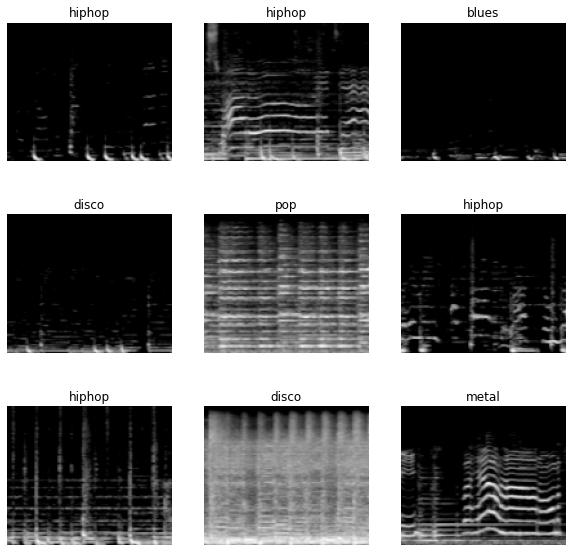

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(genre[labels[i]])
    plt.axis("off")

# Convolutional Neural Network Architecture

In [ ]:
model = tf.keras.Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(108, 128, 3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.5),
 layers.Dense(1024, activation='relu'),
  layers.Dropout(0.5),
   layers.Dense(256, activation='relu'),  layers.Dense(128, activation='relu'),
  layers.Dropout(0.5),
   layers.Dense(32, activation='relu'),
  layers.Dropout(0.5),  layers.Dense(10)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 108, 128, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 54, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 54, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 16, 128)       7

In [ ]:
model.compile(optimizer='adam', loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=40, validation_data= val_ds)

Epoch 1/40
240/240 [==============================] - 44s 62ms/step - loss: 2.6143 - accuracy: 0.1290 - val_loss: 2.1387 - val_accuracy: 0.2244
Epoch 2/40
240/240 [==============================] - 15s 60ms/step - loss: 2.1714 - accuracy: 0.1817 - val_loss: 2.0162 - val_accuracy: 0.2770
Epoch 3/40
240/240 [==============================] - 13s 53ms/step - loss: 2.0633 - accuracy: 0.2311 - val_loss: 1.8840 - val_accuracy: 0.3496
Epoch 4/40
240/240 [==============================] - 15s 61ms/step - loss: 1.9334 - accuracy: 0.2830 - val_loss: 1.7227 - val_accuracy: 0.3667
Epoch 5/40
240/240 [==============================] - 14s 58ms/step - loss: 1.8752 - accuracy: 0.2971 - val_loss: 1.7212 - val_accuracy: 0.3696
Epoch 6/40
240/240 [==============================] - 14s 58ms/step - loss: 1.7829 - accuracy: 0.3391 - val_loss: 1.5352 - val_accuracy: 0.4607
Epoch 7/40
240/240 [==============================] - 14s 57ms/step - loss: 1.7143 - accuracy: 0.3529 - val_loss: 1.5571 - val_accuracy:

# Accuracy & Loss

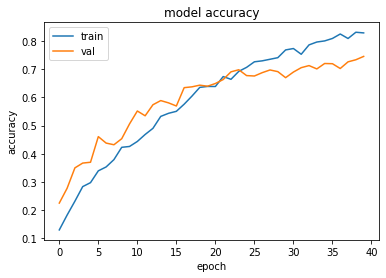

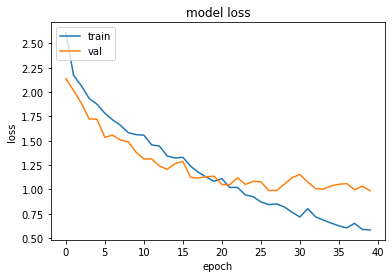

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Test on Youtube data

In [ ]:
model.evaluate(test_ds)

992/992 [==============================] - 4s 4ms/step - loss: 4.9375 - accuracy: 0.3609


[4.9375386238098145, 0.3608871102333069]

# Saving model

In [ ]:
model.save('/content/drive/MyDrive/ML_Project/models/CNN')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/ML_Project/models/CNN/assets


In [ ]:
print('done')

done
